# Sentiment analysis on Facebook extracted data

### Autore: Andrew R. Darnall

L'analisi in questione propone di studiare il sentiment dei contenuti dei posts, estratti dal
mio scraper (fb_scraper.py).
Lo scopo dell'analisi e' di studiare quanta enfasi i Social Media Managers della pagina
mettono nei loro posts e in generale vedere quale sia il corretto sentiment per approcciare il publico.

Un dataset, ottenuto dallo scraper, che ho studiato riguarda la pagina publica di [nintendo italia](https://www.facebook.com/NintendoItalia/).

Pre-requisito per la sentiment analysis e' il modello VADER, accessibile tramite
Python con il pacchetto 'vaderSentiment' {pip3 install vaderSentiment}

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

vader = SentimentIntensityAnalyzer()


Per rendere il tutto piu' semplice ed immediato, ho creato tre funzioni:

- graphData: per eseguire il plot dei dati presi in input

In [10]:
def graphData(neg, neu, pos, com, l):
    plt.figure(figsize=(14,8))
    plt.subplot(2,2,1)
    plt.title("Negative sentiment")
    plt.hist(neg)
    plt.subplot(2,2,2)
    plt.title("Neutral Sentiment")
    plt.hist(neu)
    plt.subplot(2,2,3)
    plt.title("Positive Sentiment")
    plt.hist(pos)
    plt.subplot(2,2,4)
    plt.title("Compound Sentiment")
    plt.hist(com)
    plt.show()

- computeStats: che si occupa di computare le statistiche sul sentiment complessivo dell'analisi

In [11]:
def computeStats(stats,cont):
    ng = 0
    nu = 0
    ps = 0
    cm = 0
    for i in stats['neg']:
        ng += i
    for j in stats['neu']:
        nu += j
    for k in stats['pos']:
        ps += k
    for l in stats['com']:
        cm += l
    ng = ng/cont
    nu = nu/cont
    ps = ps/cont
    cm = cm/cont
    print("------------- Overall Sentiment --------------\n\nTotal Samples:\t{}\n\nNegative Sentiment:\t{}\nNeutral Sentiment:\t{}\nPositive Sentiment:\t{}\nCompound Sentiment:\t{}\n\n----------------------------------------------\n\n".format(cont,ng,nu,ps,cm))


- graphPolarityScores: Per analizzare il sentiment dei dati e graficare i valori ottenuti

In [12]:
def graphPolarityScores(polarityMap):
    neg = []
    neu = []
    pos = []
    com = []
    for sentiment, polarity in polarityMap.items():
        neg.append(polarity['neg'])
        neu.append(polarity['neu'])
        pos.append(polarity['pos'])
        com.append(polarity['compound'])
    l = len(com)
    stats = {}
    stats['neg'] = neg
    stats['neu'] = neu
    stats['pos'] = pos
    stats['com'] = com
    computeStats(stats,l)
    graphData(neg, neu, pos, com, l)

A seguito il 'main' della analisi

Enter data source: ./NINTENDOITALIA/nintendoitalia.txt
Showing the overall gathered sentiments:


[
Sentence:	Ti ricordi il primo Pokémon che hai catturato?
Polarity:	{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
[


[
Sentence:	💪 Vuoi fare più attività fisica nel 2023? Nintendo Switch ha tutto l'occorrente per iniziare l’anno
Polarity:	{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.34}
[


[
Sentence:	Buon anno nuovo!
Polarity:	{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
[


[
Sentence:	Ci siamo!
Polarity:	{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
[


[
Sentence:	Buone feste a tutti! 🎄
Polarity:	{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
[


[
Sentence:	Sulla via di casa per le feste!
Polarity:	{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
[


[
Sentence:	Le feste stanno per iniziare e Kirby ha già preparato tutti gli addobbi!
Polarity:	{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.4003}
[


[
Sentence:	
Polarity:	{'neg':

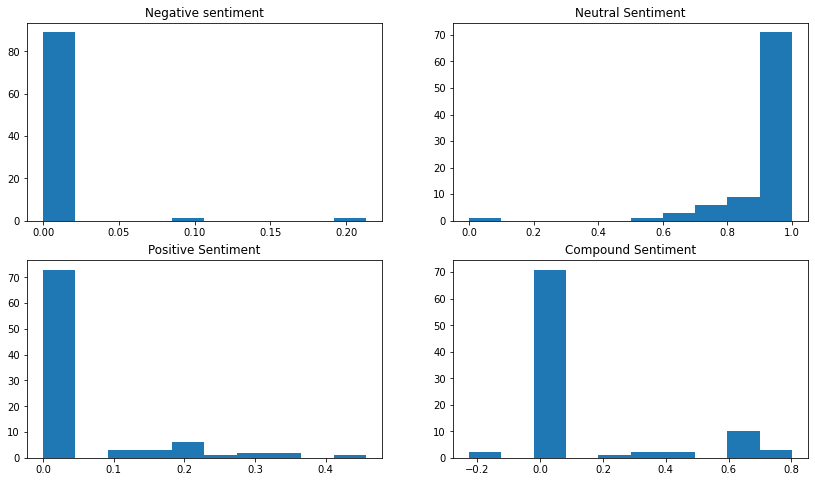

End of analysis


In [13]:
dataSource = input("Enter data source: ")
data = open(dataSource,"r")
sentimentMap = {}
for line in data:
    sentimentMap[line.strip()] = vader.polarity_scores(line.strip())
print("Showing the overall gathered sentiments:\n\n")
for sentence, polarity in sentimentMap.items():
    print("[\nSentence:\t{}\nPolarity:\t{}\n[\n\n".format(sentence,polarity))
graphPolarityScores(sentimentMap)
print("End of analysis")

Per quanto riguarda la specifica della fonte dei dati, potevo richiederla in input come argomento dello script (a 'compile' time), oppure richiederlo a run time.

A seguito il 'main' dello script, dove prendendo in input il path assoluto o relativo della risorsa, in questo caso la directory NINTENDOITALIA:

<img src="./IMGS/dirPic.png" alt="directoryPicture"/>

all'interno di tale directory e' situato il file di testo 'nintendoitalia.txt' che contiene il testo estrapolato dai posts:

<img src="./IMGS/textPic.png" alt="textPic"/>
<img src="./IMGS/detailsPic.png" alt="detailsPic"/>

Da notare come la prima riga corrisponda con il primo post disponibile nella pagina.

La sorgente della analisi dei dati e' 'dataAnalytics.py', reperibile nella stessa repo GitHub
in cui si trova il notebook Jupyter.

<img src="./IMGS/analysisResult.png" alt="analysRes"/>

A seguito dell'analisi possiamo concludere che generalmente i posts della Nintendo tendono a
essere prevalentemente con sentiment neutro, lievemente con sentiment composto, pochissimo sentiment positivo e pressoce' nessun sentiment negativo inferendo che questo si il modo per restare pacati e professionali pur restando in ambito Social Media dove spesso si tende ad esagerare con il sentiment per appagare il proprio audience.